# Hierarchical Clustering

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
# Importing the dataset
dataset = pd.read_csv('covid19_cfr.csv')
X = dataset.iloc[:, [1,3,4,5,6,7,8,9,10,11]].values

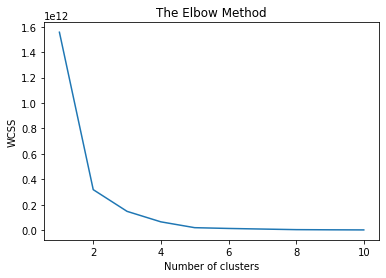

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Using the dendrogram to find the optimal number of clusters

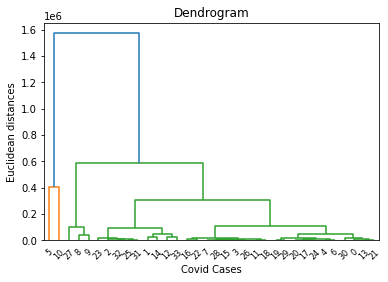

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Covid Cases')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [5]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

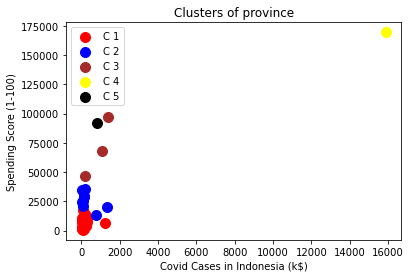

In [6]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'C 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'C 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'brown', label = 'C 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = 'C 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'black', label = 'C 5')
#plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'purple', label = 'C 6')

plt.title('Clusters of province')
plt.xlabel('Covid Cases in Indonesia (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [7]:
# Evaluation
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_hc)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.29233440963138657


In [8]:
#Cluster result
dfLabels=pd.DataFrame(y_hc, columns=["hasil"])+1
Cluster = 'Cluster ' + pd.DataFrame(dfLabels['hasil'].map(str) + ' - ' + dataset['provinsi'].map(str), columns=["result"]).sort_values(by=["result"])

In [9]:
Cluster

,result
0,Cluster 1 - Aceh
3,Cluster 1 - Bengkulu
4,Cluster 1 - Daerah Istimewa Yogyakarta
6,Cluster 1 - Gorontalo
7,Cluster 1 - Jambi
11,Cluster 1 - Kalimantan Barat
13,Cluster 1 - Kalimantan Tengah
15,Cluster 1 - Kalimantan Utara
16,Cluster 1 - Kepulauan Bangka Belitung
17,Cluster 1 - Kepulauan Riau
